In [2]:
using Flux

In [3]:
model = Dense(1, 1)

Dense(1 => 1)       # 2 parameters

In [4]:
model.weight

1×1 Matrix{Float32}:
 -0.07157447

In [5]:
model.bias

1-element Vector{Float32}:
 0.0

In [8]:
layer1 = Dense(1, 2)
layer2 = Dense(2, 1)
model = Chain(layer1, layer2)

Chain(
  Dense(1 => 2),                        # 4 parameters
  Dense(2 => 1),                        # 3 parameters
)                   # Total: 4 arrays, 7 parameters, 284 bytes.

In [15]:
conv1 = Conv((5, 5), 2 => 4, relu)

Conv((5, 5), 2 => 4, relu)  # 204 parameters

In [21]:
xs = rand(Float32, 100, 100, 2, 50);
size(xs)

(100, 100, 2, 50)

In [24]:
o = conv1(xs);
size(o)

(96, 96, 4, 50)

In [25]:
using Plots

In [26]:
σ

σ (generic function with 2 methods)

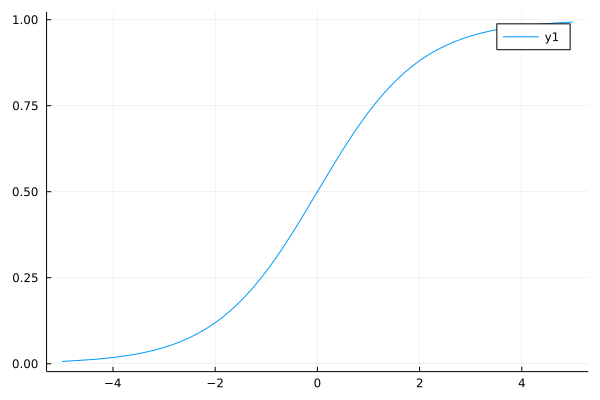

In [28]:
plot(σ, -5, 5)

In [69]:
 model = Dense(2, 2, σ)

Dense(2 => 2, σ)    # 6 parameters

In [70]:
model

Dense(2 => 2, σ)    # 6 parameters

In [71]:
typeof(model)

Dense{typeof(σ), Matrix{Float32}, Vector{Float32}}

In [83]:
x = rand(2)

2-element Vector{Float64}:
 0.18505533032649124
 0.1012435798401129

In [84]:
model(x) 

2-element Vector{Float64}:
 0.4322717444049653
 0.5080802611387616

In [87]:
σ.(model.weight*x+model.bias)

2-element Vector{Float64}:
 0.4322717444049654
 0.5080802611387616

In [89]:
methods(Flux.mse)

# 1 method for generic function "mse":
[1] mse(ŷ, y; agg) in Flux.Losses at /home/sathvik/.julia/packages/Flux/18YZE/src/losses/functions.jl:45

In [10]:
x1 = rand(1:10, 400);
x2 = rand(5:15, 400);
x = [x1; x2]
y = [fill(0, size(x1)); fill(1, size(x2))];

Dense(1 => 1, σ)    # 2 parameters

(1, 3)(1, 3)

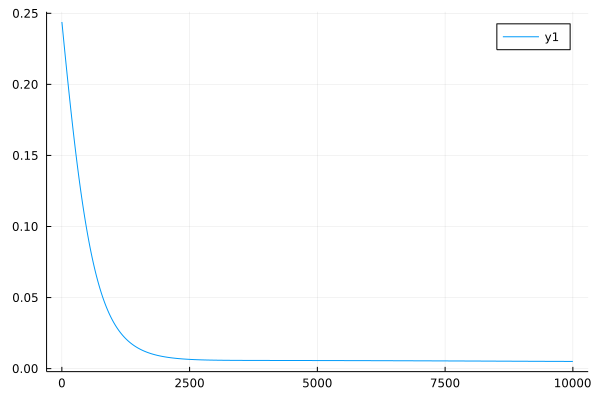

In [168]:
model = Dense(1, 1, σ)
x = [rand(1) rand(1) rand(1)]
y = [rand( 1) rand( 1) rand( 1)]
print(size(x), size(y))
lossfn(x1, y1) = Flux.Losses.mse(model(x1), y1)
ps = Flux.params(model)
opt = Flux.ADAM()
dataset = Base.Iterators.repeated((x, y), 10000)
loss_vector = []
callback() = push!(loss_vector, loss(x, y))
Flux.train!(lossfn, ps, dataset, opt, cb=callback)
plot(loss_vector)

In [85]:
data = zip(x,y)
loss(first(data)...)

0.039801635997502624

In [90]:
model(first(x))

1-element Vector{Float64}:
 0.6152388762751495

In [94]:
lossfn(x,y).data

LoadError: DimensionMismatch("matrix A has dimensions (1,1), vector B has length 3")

In [97]:
using LinearAlgebra
using Random
using Plots
using Flux # Julia package for deep learning
using Flux: throttle, mse

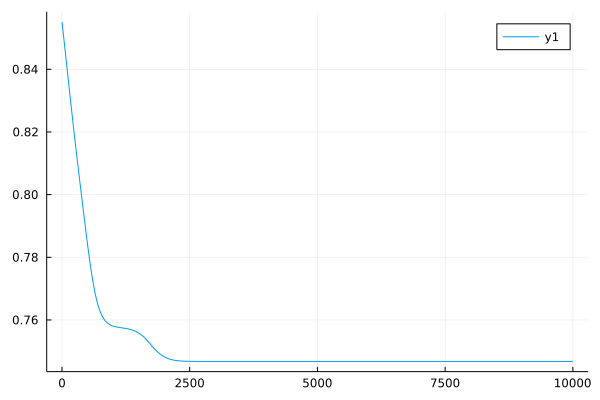

In [158]:
function simdata(; n1 = 40, n2 = 120, σ1 = 0.8, σ2 = 2, r2 = 3)
    data1 = σ1 * randn(2,n1)
    rad2 = r2 .+ σ2*rand(1,n2)
    ang2 = rand(1,n2) * 2π
    data2 = [rad2 .* cos.(ang2); rad2 .* sin.(ang2)]
    X = [data1 data2] # 2 × N = n1+n2
    Y = [-ones(1,n1) ones(1,n2)] # 1 × N
    @assert size(X,2) == size(Y,2)
    return (X,Y)
end;
x,y = simdata()
model = Dense(2, 1, σ)
loss(x1, y1) = mse(model(x1), y1)
opt = Flux.ADAM()
ps = Flux.params(model)
dataset = Base.Iterators.repeated((x, y), 10000)
loss_vector = []
callback() = push!(loss_vector, loss(x, y))
Flux.train!(loss, ps, dataset, opt, cb=callback)
plot(loss_vector)

In [159]:

size(x), size(y)

((2, 160), (1, 160))